<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Bike Sharing Demand Regression</h3>
</div>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Prepare Data

In [2]:
# Importing dataset
df = pd.read_csv('train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


The dataset appears to have the following columns with descriptions provided earlier:

* datetime: The timestamp of each observation.
* season: Season indicator (1 = spring, 2 = summer, 3 = fall, 4 = winter).
* holiday: Whether the day is a holiday (1) or not (0).
* workingday: Whether the day is a working day (1) or not (0).
* weather: Categorical variable representing weather conditions (1 to 4).
* temp: Temperature in Celsius.
* atemp: Feels-like temperature in Celsius.
* humidity: Relative humidity.
* windspeed: Wind speed.
* casual: Number of rentals by non-registered users.
* registered: Number of rentals by registered users.
* count: Total number of rentals (casual + registered).

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in the dataset, which is great for proceeding with further analysis.
Here's a summary of the basic statistics:

* Temperature (temp) ranges from 0.82°C to 41.0°C, with a mean of 20.23°C.
* "Feels like" temperature (atemp) has a wider range, from 0.76°C to 45.46°C, with a mean of 23.65°C.
* Humidity ranges from 0% to 100%, with a mean of about 61.89%.
* Windspeed shows a significant variation, from 0 to nearly 57, with a mean of about 12.8.
* Casual and registered user rentals have a mean of 36 and 155, respectively.
* The total number of rentals (count) ranges from 1 to 977, with a mean of 191.

In [7]:
df.shape

(10886, 12)

In [8]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
weather_counts = df['weather'].value_counts()
weather_counts

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

* Weather 1 => Clear, Few clouds, Partly cloudy, Partly cloudy = 7192
* Weather 2 => Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = 2834
* Weather 3 => Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = 859
* Weather 4 => Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [11]:
workingday_counts = df['workingday'].value_counts()
workingday_counts

workingday
1    7412
0    3474
Name: count, dtype: int64

* Working Day (Yes) => 7412
* Working Day (No) => 3474

In [12]:
holiday_counts = df['holiday'].value_counts()
holiday_counts

holiday
0    10575
1      311
Name: count, dtype: int64

* holiday (Yes) => 311
* holiday (No) => 10575

In [13]:
season_counts = df['season'].value_counts()
season_counts

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

* 1 => Spring = 2686
* 2 => Summer = 2733
* 3 => Fall = 2733
* 4 => Winter = 2734

## Strorytelling - Visualization

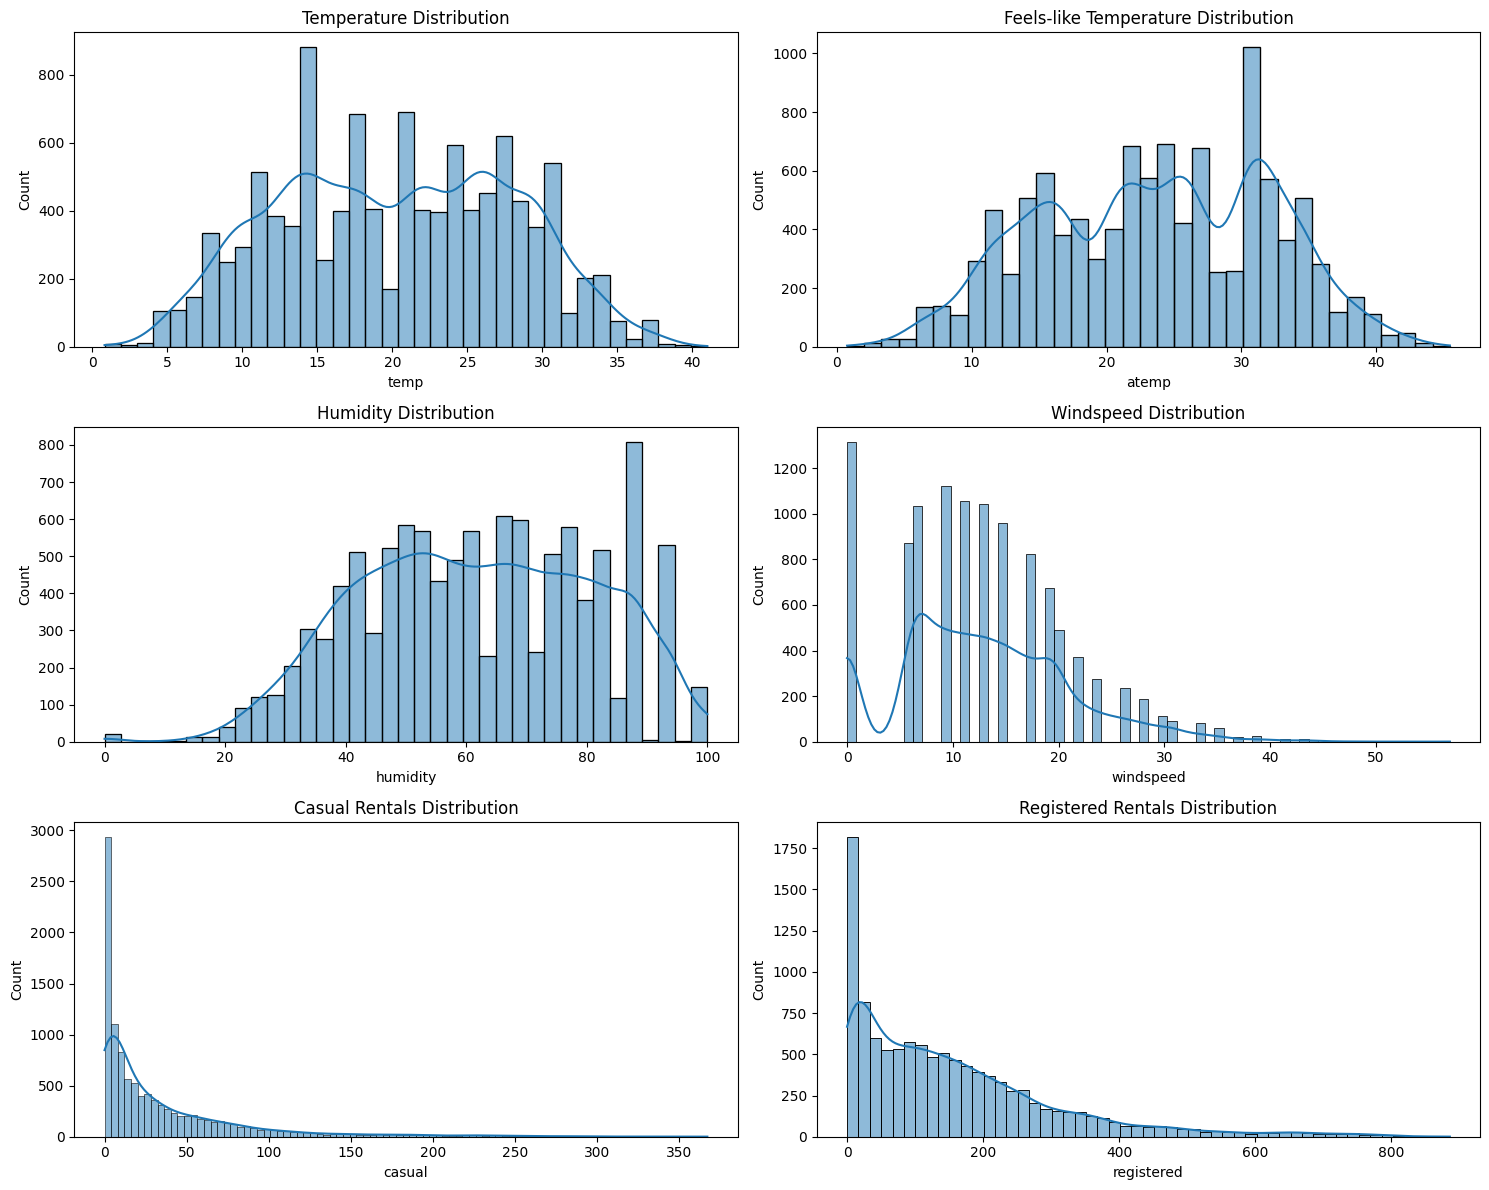

In [14]:
# Convert 'datetime' to datetime type for time-based analysis
df['datetime'] = pd.to_datetime(df['datetime'])

# Plot histograms of the key numerical features
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Temperature distribution
sns.histplot(df['temp'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Temperature Distribution')

# Feels-like temperature distribution
sns.histplot(df['atemp'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Feels-like Temperature Distribution')

# Humidity distribution
sns.histplot(df['humidity'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Humidity Distribution')

# Windspeed distribution
sns.histplot(df['windspeed'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Windspeed Distribution')

# Casual user rentals distribution
sns.histplot(df['casual'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Casual Rentals Distribution')

# Registered user rentals distribution
sns.histplot(df['registered'], kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Registered Rentals Distribution')

plt.tight_layout()
plt.show()

The histograms above reveal the following insights:

* Temperature and Feels-like Temperature: Both temperature and feels-like temperature are roughly normally distributed with some skewness towards higher temperatures.
* Humidity: Humidity shows a more uniform distribution, with peaks around the 50-60% and 80-100% ranges.
* Windspeed: Windspeed has a significant portion of values around 0, and a general trend towards lower wind speeds.
* Casual and Registered Rentals: Casual rentals show a highly skewed distribution with most values near zero, while registered rentals are more spread out but still show some right skewness.

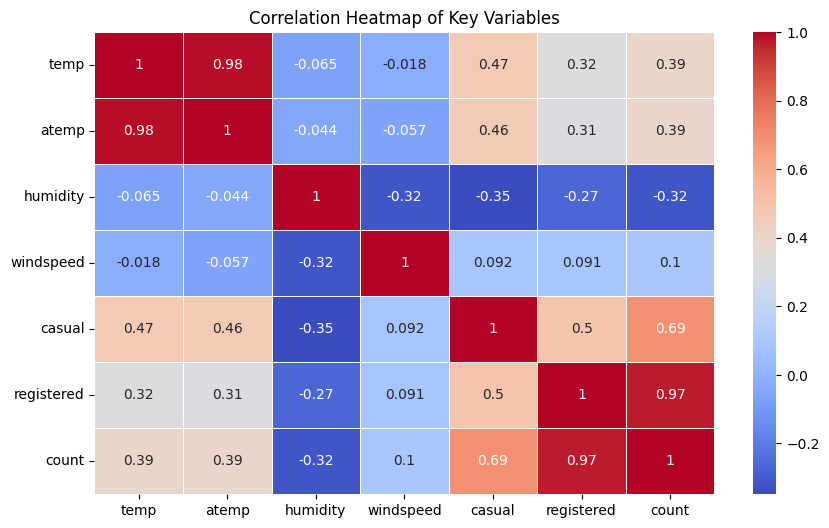

In [15]:
# Correlation matrix
correlation_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

# Plotting the heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

* The correlation heatmap provides the following insights:
1) Strong Positive Correlation:
* Temperature (temp) and Feels-like Temperature (atemp) are highly correlated (𝑟= 0.99), which is expected as they are closely related measures.
* Count (total rentals) has a strong positive correlation with both registered and casual rentals, with a slightly stronger relationship with registered rentals (𝑟 = 0.97)
2) Moderate Relationships:
* Temperature has a moderate positive correlation with the count (𝑟 = 0.39) and registered rentals (𝑟 =0.32), indicating that warmer temperatures generally lead to more rentals.
* Humidity has a weak negative correlation with the count and registered rentals, suggesting that high humidity might slightly reduce the number of rentals.
3) Weak/No Signficant Correlation:
* Windspeed has very little correlation with any of the other variables, suggesting that windspeed does not significantly influence rental numbers.

C:\Users\Ghost\AppData\Local\Temp\ipykernel_27180\4069875389.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


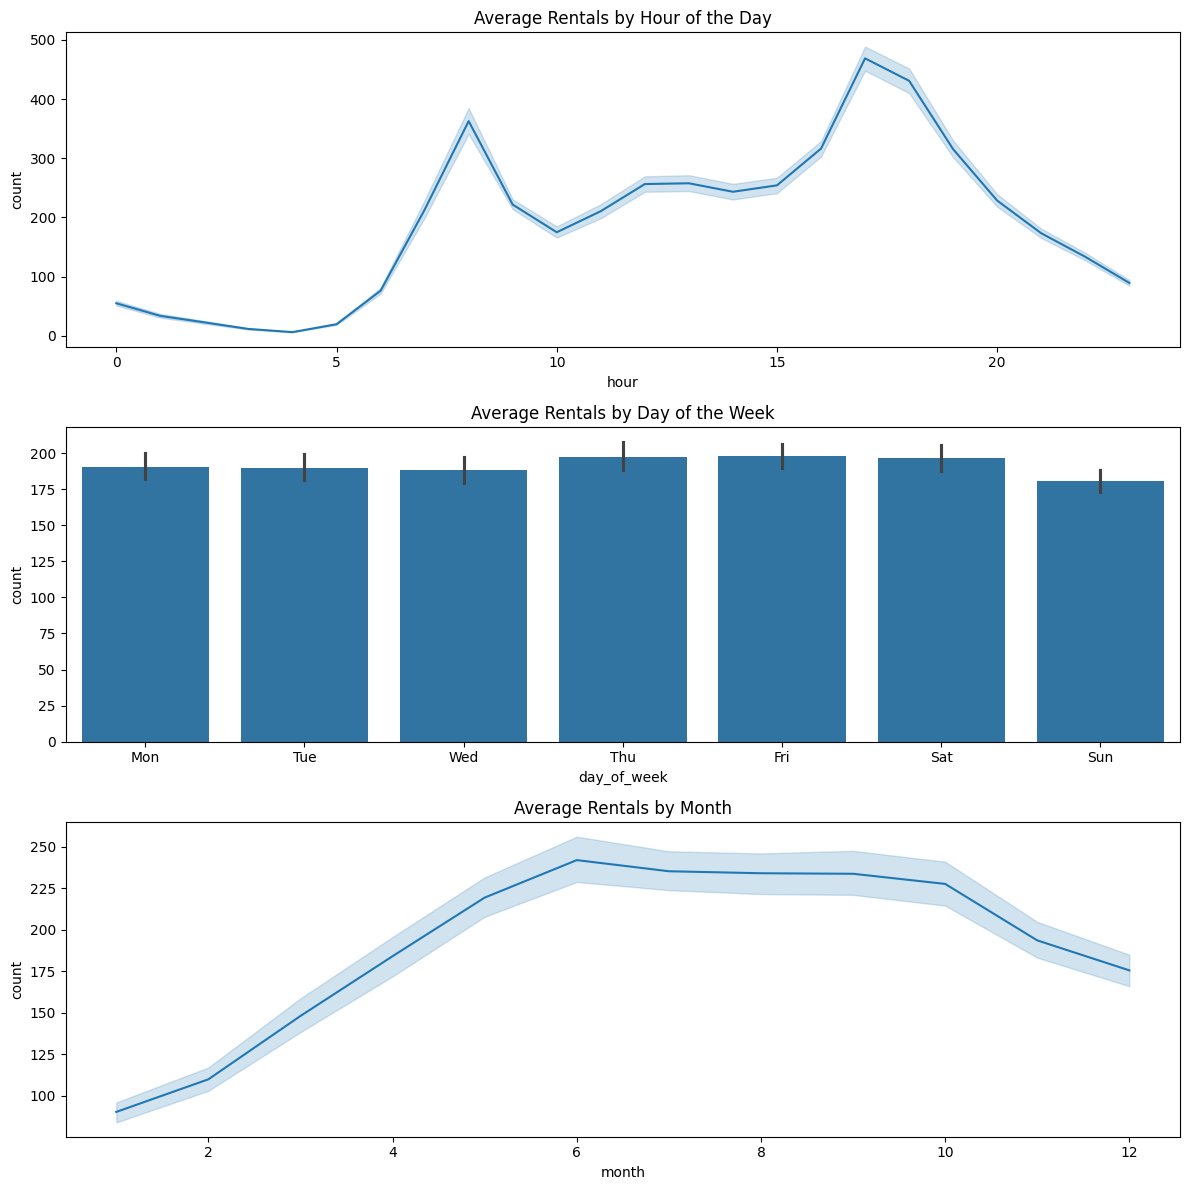

In [16]:
# Extracting additional time-based features from 'datetime'
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Plot average rentals by hour, day of the week, and month
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Average rentals by hour
sns.lineplot(x='hour', y='count', data=df, ax=axs[0])
axs[0].set_title('Average Rentals by Hour of the Day')

# Average rentals by day of the week
sns.barplot(x='day_of_week', y='count', data=df, ax=axs[1])
axs[1].set_title('Average Rentals by Day of the Week')
axs[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Average rentals by month
sns.lineplot(x='month', y='count', data=df, ax=axs[2])
axs[2].set_title('Average Rentals by Month')

plt.tight_layout()
plt.show()

The time-based analysis of rentals reveals the following:

* Average Rentals by Hour:
There is a clear pattern of rental activity peaking during morning hours (around 8 AM) and evening hours (around 5-6 PM), which corresponds to commuting times. Rentals dip in the late night and early morning hours.

* Average Rentals by Day of the Week:
Rentals are generally higher during weekdays, with a noticeable drop on weekends (Saturday and Sunday). This suggests that most rentals happen during working days, likely for commuting purposes.

* Average Rentals by Month:
Rentals tend to increase from early spring (March/April) and peak during the summer months, with a decline in the colder months of fall and winter.

## Data Preprocessing

#### Convert datetime to pandas datetime type and extract useful features

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [18]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day_of_week,month,year,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,5,1,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,5,1,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,5,1,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,5,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2,12,2012,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2,12,2012,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2,12,2012,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2,12,2012,19


#### Drop unnecessary columns for the regression (casual and registered since they overlap with count, and datetime)

In [19]:
df.drop(columns=['datetime', 'casual', 'registered'], inplace=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day_of_week,month,year,day
0,1,0,0,1,9.84,14.395,81,0.0000,16,0,5,1,2011,1
1,1,0,0,1,9.02,13.635,80,0.0000,40,1,5,1,2011,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2,5,1,2011,1
3,1,0,0,1,9.84,14.395,75,0.0000,13,3,5,1,2011,1
4,1,0,0,1,9.84,14.395,75,0.0000,1,4,5,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,19,2,12,2012,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,20,2,12,2012,19
10883,4,0,1,1,13.94,15.910,61,15.0013,168,21,2,12,2012,19
10884,4,0,1,1,13.94,17.425,61,6.0032,129,22,2,12,2012,19


#### Define features and target

In [20]:
X = df.drop(columns=['count'])
y = df['count']

In [21]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day_of_week,month,year,day
0,1,0,0,1,9.84,14.395,81,0.0000,0,5,1,2011,1
1,1,0,0,1,9.02,13.635,80,0.0000,1,5,1,2011,1
2,1,0,0,1,9.02,13.635,80,0.0000,2,5,1,2011,1
3,1,0,0,1,9.84,14.395,75,0.0000,3,5,1,2011,1
4,1,0,0,1,9.84,14.395,75,0.0000,4,5,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,2,12,2012,19
10882,4,0,1,1,14.76,17.425,57,15.0013,20,2,12,2012,19
10883,4,0,1,1,13.94,15.910,61,15.0013,21,2,12,2012,19
10884,4,0,1,1,13.94,17.425,61,6.0032,22,2,12,2012,19


In [22]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (only for models that require scaling, but we do it here for simplicity across models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day_of_week,month,year,day
2815,3,0,1,1,27.88,31.820,83,6.0032,5,2,7,2011,6
8695,3,0,0,1,36.90,40.910,39,19.9995,16,5,8,2012,4
8406,3,0,1,1,32.80,35.605,41,16.9979,15,2,7,2012,11
1543,2,0,0,2,14.76,18.180,93,7.0015,4,6,4,2011,10
4952,4,0,0,1,13.12,15.150,45,16.9979,10,5,11,2011,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,1,6.56,8.335,47,11.0014,2,5,1,2012,14
5191,4,0,0,1,11.48,12.880,61,19.0012,9,5,12,2011,10
5390,4,0,0,1,11.48,13.635,48,16.9979,16,6,12,2011,18
860,1,0,0,1,15.58,19.695,17,35.0008,7,5,2,2011,19


In [25]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day_of_week,month,year,day
3133,3,0,1,1,33.62,40.150,59,0.0000,11,1,7,2011,19
5786,1,1,0,1,4.10,6.820,54,6.0032,6,0,1,2012,16
5224,4,0,0,1,9.84,11.365,48,12.9980,18,6,12,2011,11
8953,3,0,1,2,29.52,34.090,62,12.9980,10,2,8,2012,15
8054,2,0,1,1,25.42,31.060,53,16.9979,23,4,6,2012,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2,0,0,3,23.78,27.275,49,19.0012,17,6,5,2011,8
5807,1,0,1,3,13.12,15.150,66,22.0028,4,1,1,2012,17
10061,4,0,0,1,16.40,20.455,40,12.9980,14,6,11,2012,4
5427,1,0,0,1,11.48,14.395,81,7.0015,5,6,1,2012,1


In [26]:
y_train

2815     35
8695    450
8406    276
1543      5
4952    200
       ... 
5734     38
5191    149
5390    234
860      22
7270    358
Name: count, Length: 8708, dtype: int64

In [27]:
y_test

3133     127
5786      13
5224     163
8953     233
8054     222
        ... 
1963     351
5807       2
10061    509
5427       5
7588     239
Name: count, Length: 2178, dtype: int64

## Train your model (Regression)

Now, using the regression algorithms below, we train the model with the data of the train.csv file, and then check and announce the performance of each model using the data of the test.csv file.
* Linear Regression  
* KNN Regressor 
* Decision Tree Regressor 
* Random Forest Regressor 

After that, I will evaluate the models using appropriate metrics such as:

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R-squared (R²)

### Linear Regression 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
# Predictions
y_pred_linear = linear_model.predict(X_test_scaled)

In [30]:
# Evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [31]:
# Display the results for Linear Regression
linear_regression_results = {
    'MAE': mae_linear,
    'MSE': mse_linear,
    'RMSE': rmse_linear,
    'R-squared': r2_linear
}

linear_regression_results

{'MAE': 105.2994407558985,
 'MSE': 19940.436219858897,
 'RMSE': 141.21060944510825,
 'R-squared': 0.3958713313651959}

#### The performance metrics for the Linear Regression model are as follows:

* Mean Absolute Error (MAE): 105.30
* Mean Squared Error (MSE): 19,940.43
* Root Mean Squared Error (RMSE): 141.21
* R-squared (R²): 0.396

### KNN Regression 

In [32]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [33]:
# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

In [34]:
# Evaluation metrics for KNN Regressor
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [35]:
# Display the results for KNN Regressor
knn_regression_results = {
    'MAE': mae_knn,
    'MSE': mse_knn,
    'RMSE': rmse_knn,
    'R-squared': r2_knn
}

knn_regression_results

{'MAE': 82.2564738292011,
 'MSE': 14754.614967860422,
 'RMSE': 121.46857605101174,
 'R-squared': 0.5529844082410076}

#### The performance metrics for the KNN Regressor model are as follows:

* Mean Absolute Error (MAE): 82.25
* Mean Squared Error (MSE): 14,754.61
* Root Mean Squared Error (RMSE): 121.47
* R-squared (R²): 0.553

### Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [37]:
# Predictions
y_pred_tree = tree_model.predict(X_test_scaled)

In [38]:
# Evaluation metrics for Decision Tree Regressor
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [39]:
# Display the results for Decision Tree Regressor
tree_regression_results = {
    'MAE': mae_tree,
    'MSE': mse_tree,
    'RMSE': rmse_tree,
    'R-squared': r2_tree
}

tree_regression_results

{'MAE': 33.607438016528924,
 'MSE': 3450.479797979798,
 'RMSE': 58.74078479199778,
 'R-squared': 0.8954619776858836}

#### The performance metrics for the Decision Tree Regressor model are as follows:

* Mean Absolute Error (MAE): 33.61
* Mean Squared Error (MSE): 3,450.48
* Root Mean Squared Error (RMSE): 58.74
* R-squared (R²): 0.895

### Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor model
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [41]:
# Predictions
y_pred_forest = forest_model.predict(X_test_scaled)

In [42]:
# Evaluation metrics for Random Forest Regressor
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest)

In [43]:
# Display the results for Random Forest Regressor
forest_regression_results = {
    'MAE': mae_forest,
    'MSE': mse_forest,
    'RMSE': rmse_forest,
    'R-squared': r2_forest
}

forest_regression_results

{'MAE': 24.285941230486685,
 'MSE': 1507.5936546372818,
 'RMSE': 38.82774336266894,
 'R-squared': 0.9543249436784516}

#### The performance metrics for the Random Forest Regressor model are as follows:

* Mean Absolute Error (MAE): 24.28
* Mean Squared Error (MSE): 1,507.59
* Root Mean Squared Error (RMSE): 38.83
* R-squared (R²): 0.954

## Perdict Tests Data

In [44]:
test_data = pd.read_csv('test.csv')

In [45]:
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [46]:
# Preprocessing the test data: Convert datetime, scale and prepare features
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
test_data['hour'] = test_data['datetime'].dt.hour
test_data['day'] = test_data['datetime'].dt.day
test_data['month'] = test_data['datetime'].dt.month
test_data['year'] = test_data['datetime'].dt.year
test_data['day_of_week'] = test_data['datetime'].dt.dayofweek

In [47]:
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,day_of_week
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,20,1,2011,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,20,1,2011,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,20,1,2011,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,19,31,12,2012,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,20,31,12,2012,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,21,31,12,2012,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,22,31,12,2012,0


In [48]:
# Drop the datetime column as it's no longer needed
X_test_final = test_data.drop(columns=['datetime'])

In [49]:
X_test_final

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,day_of_week
0,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,20,1,2011,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,20,1,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,20,1,2011,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,31,12,2012,0
6489,1,0,1,2,10.66,12.880,60,11.0014,20,31,12,2012,0
6490,1,0,1,1,10.66,12.880,60,11.0014,21,31,12,2012,0
6491,1,0,1,1,10.66,13.635,56,8.9981,22,31,12,2012,0


In [50]:
X_test_final = scaler.fit_transform(X_test_final)
X_test_final

array([[-1.36852657, -0.17315012,  0.67684424, ..., -1.62284907,
        -1.00726495, -0.0036237 ],
       [-1.36852657, -0.17315012,  0.67684424, ..., -1.62284907,
        -1.00726495, -0.0036237 ],
       [-1.36852657, -0.17315012,  0.67684424, ..., -1.62284907,
        -1.00726495, -0.0036237 ],
       ...,
       [-1.36852657, -0.17315012,  0.67684424, ...,  1.58489845,
         0.99278745, -1.50545615],
       [-1.36852657, -0.17315012,  0.67684424, ...,  1.58489845,
         0.99278745, -1.50545615],
       [-1.36852657, -0.17315012,  0.67684424, ...,  1.58489845,
         0.99278745, -1.50545615]])

In [51]:
# Linear Regression prediction
y_pred_linear_test = linear_model.predict(X_test_final)
y_pred_linear_test

array([-32.76753789, -27.90097692, -20.02461989, ..., 321.23124984,
       339.81588142, 329.40834446])

In [53]:
# KNN Regressor prediction
y_pred_knn_test = knn_model.predict(X_test_final)
y_pred_knn_test

array([ 25.6,  15.8,  15.8, ..., 110. , 128.6, 114.6])

In [54]:
# Decision Tree Regressor prediction
y_pred_tree_test = tree_model.predict(X_test_final)
y_pred_tree_test

array([19.,  5.,  2., ..., 52., 52., 29.])

In [56]:
# Random Forest Regressor prediction
y_pred_forest_test = forest_model.predict(X_test_final)
y_pred_tree_test

array([19.,  5.,  2., ..., 52., 52., 29.])

### Modify the plot to make the differences clearer and highlight the negative values from Linear Regression

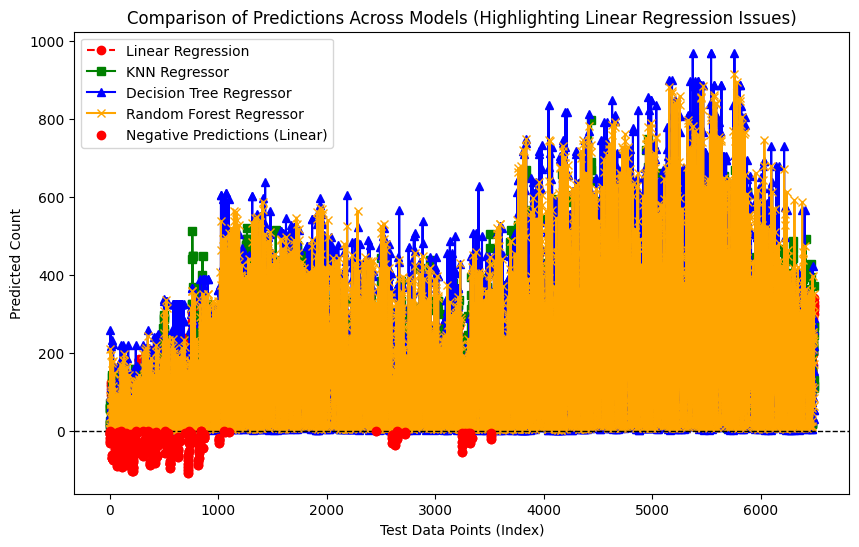

In [59]:
predictions_corrected = pd.DataFrame({
    'Linear Regression': y_pred_linear_test,
    'KNN Regressor': y_pred_knn_test,
    'Decision Tree Regressor': y_pred_tree_test,
    'Random Forest Regressor': y_pred_forest_test
})

# Plotting the predictions again with clear distinction and highlighting Linear Regression's negative values
plt.figure(figsize=(10, 6))

# Plot each model's predictions with distinct markers
plt.plot(predictions_corrected.index, predictions_corrected['Linear Regression'], label='Linear Regression', marker='o', color='red', linestyle='--')
plt.plot(predictions_corrected.index, predictions_corrected['KNN Regressor'], label='KNN Regressor', marker='s', color='green')
plt.plot(predictions_corrected.index, predictions_corrected['Decision Tree Regressor'], label='Decision Tree Regressor', marker='^', color='blue')
plt.plot(predictions_corrected.index, predictions_corrected['Random Forest Regressor'], label='Random Forest Regressor', marker='x', color='orange')

# Highlight the negative predictions for Linear Regression
negative_preds_corrected = predictions_corrected[predictions_corrected['Linear Regression'] < 0]
plt.scatter(negative_preds_corrected.index, negative_preds_corrected['Linear Regression'], color='red', label='Negative Predictions (Linear)', zorder=5)

# Adding labels and title
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Highlight the zero line for clarity
plt.xlabel('Test Data Points (Index)')
plt.ylabel('Predicted Count')
plt.title('Comparison of Predictions Across Models (Highlighting Linear Regression Issues)')
plt.legend()

# Show the enhanced plot
plt.show()

The chart has been updated with the corrected variable names for the predictions of each model. It clearly demonstrates the comparison of predictions across all models, highlighting the negative predictions from Linear Regression (red, dashed line), which are marked with red dots.

In [60]:
predictions_corrected.to_csv('predictions_comparison.csv', index=False)

In [61]:
predictions_corrected_df = pd.read_csv('predictions_comparison.csv')

In [62]:
predictions_corrected_df

,Linear Regression,KNN Regressor,Decision Tree Regressor,Random Forest Regressor
0,-32.767538,25.6,19.0,12.28
1,-27.900977,15.8,5.0,4.48
2,-20.024620,15.8,2.0,2.54
3,-9.878483,3.6,1.0,3.02
4,-2.002126,54.4,1.0,3.02
...,...,...,...,...
6488,300.422818,268.6,258.0,228.60
6489,308.299175,268.6,216.0,170.76
6490,321.231250,110.0,52.0,108.07
6491,339.815881,128.6,52.0,83.63
